In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from backtest import Trader, DoubleTrader, historic_rates
from algorithms import SMA, EMA, MovingAverageAlgo

%matplotlib inline

From: 2018-02-18T16:31:03, To: 2018-02-19T21:41:03
From: 2018-02-17T11:21:03, To: 2018-02-18T16:31:03
From: 2018-02-16T06:11:03, To: 2018-02-17T11:21:03
From: 2018-02-15T01:01:03, To: 2018-02-16T06:11:03
From: 2018-02-13T19:51:03, To: 2018-02-15T01:01:03
From: 2018-02-12T14:41:03, To: 2018-02-13T19:51:03
2106
128.29454986883567
[7010.29, 7008.63, 6995.12, 7005, 7040, 7026.63, 7039.99, 7039.03, 7030.81, 7044.99]


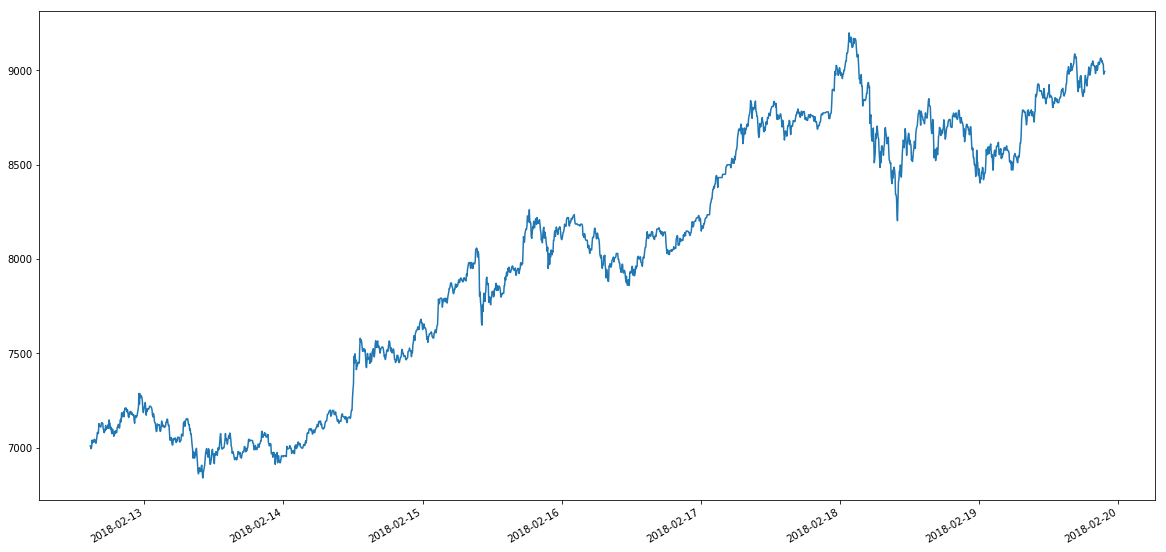

In [55]:
rates = historic_rates('BTC-EUR', 2048, granularity=300)
prices = [x[4] for x in rates]
while 'a' in prices: prices.remove('a')
times = [x[0] for x in rates]
while 'm' in times: times.remove('m')

prices.reverse()
times.reverse()

print(len(prices))

times_s = pd.Series(times).astype("datetime64[s]")
time_price = pd.Series(prices, times_s)

time_price.plot(figsize=(20,10))
print(prices[-1]/prices[0] * 100)
print(prices[:10])

In [46]:
class StochasticOscillator:
    def __init__(self, window=14, smooth=3):
        self.data = np.zeros(window) + 0.5
        self.avg = EMA(smooth)
        
    def tick(self, price):
        stance = False
        self.data = np.roll(self.data, -1)
        self.data[-1] = price
        low = np.min(self.data)
        high = np.max(self.data)
        if high == low:
            so = 0.5
        else:
            so = (price - low) / (high - low)
        avgv = self.avg.tick(so)
#         print('SO = {}, Avg = {}'.format(so, avgv))
        if avgv:
            stance = so > avgv
#         return stance, so, avgv
        return stance

        

In [ ]:
class StochasticOscillator2:
    def __init__(self, window=14, smooth=3, cut=0.2):
        self.data = np.zeros(window) + 0.5
        self.avg = SMA(smooth)
        self.cut = cut
        self.stance = False
        
    def tick(self, price):
        stance = False
        self.data = np.roll(self.data, -1)
        self.data[-1] = price
        low = np.min(self.data)
        high = np.max(self.data)
        so = (price - low) / (high - low)
        avgv = self.avg.tick(so)
        #print('SO = {}, Avg = {}, Cut = {}'.format(so, avgv, self.cut))
        if avgv:
            if so < self.cut and so > avgv:
                self.stance = True
            if so > (1.0 - self.cut) and so < avgv:
                self.stance = False
        return self.stance, so, avgv
        

In [56]:
potential = []
look_back = 72
print(prices[-1]/prices[-look_back] * 100)

for window in range (2, 30, 2):
    for smooth in np.arange(2, 30, 2):
        algo = StochasticOscillator(window, smooth)
        for price in prices[-(window + look_back + smooth):-look_back]:
            algo.tick(price)
        trader = Trader(algo, verbose=False)
        final = 0
        for price in prices[-look_back:]:
            final, _ = trader.tick(price)
        potential.append((window, smooth, final))
potential.sort(key=lambda tup: tup[2], reverse=True)
for sims in potential:
    print("{} - {} : {}".format(*sims))

99.98699275930267
6 - 2 : 103.45266902547681
18 - 2 : 102.20940474264242
14 - 2 : 102.19485975890632
4 - 10 : 102.17871765623298
10 - 2 : 102.00847012916589
28 - 2 : 101.99207310608884
8 - 2 : 101.95995812937826
16 - 2 : 101.94318015749957
4 - 8 : 101.82365460085128
22 - 2 : 101.80426117797414
6 - 6 : 101.76126607854884
26 - 2 : 101.76059155941459
28 - 6 : 101.73665182687841
2 - 6 : 101.66940230916146
24 - 2 : 101.60300815976116
2 - 4 : 101.58497245621497
4 - 6 : 101.56184910545352
12 - 28 : 101.54827384121731
26 - 6 : 101.50994944810509
2 - 2 : 101.50122694070551
2 - 8 : 101.44128195972637
2 - 10 : 101.44128195972637
2 - 12 : 101.44128195972637
2 - 14 : 101.44128195972637
2 - 16 : 101.44128195972637
2 - 18 : 101.44128195972637
2 - 20 : 101.44128195972637
2 - 22 : 101.44128195972637
2 - 24 : 101.44128195972637
2 - 26 : 101.44128195972637
2 - 28 : 101.44128195972637
16 - 28 : 101.41660251803805
12 - 2 : 101.41285826699794
14 - 16 : 101.37359019503087
8 - 6 : 101.36451362713163
4 - 2 : 1

In [101]:
for sims in potential[:10]:
    print("{} - {} : {}".format(*sims))

2 - 2 : 105.5976331360946
2 - 3 : 105.5976331360946
2 - 4 : 105.5976331360946
2 - 5 : 105.5976331360946
2 - 6 : 105.5976331360946
2 - 7 : 105.5976331360946
2 - 8 : 105.5976331360946
2 - 9 : 105.5976331360946
2 - 10 : 105.5976331360946
2 - 11 : 105.5976331360946


/Users/rhanes/.miniconda2/envs/finance/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


99.50118517360839
99.55693975683815


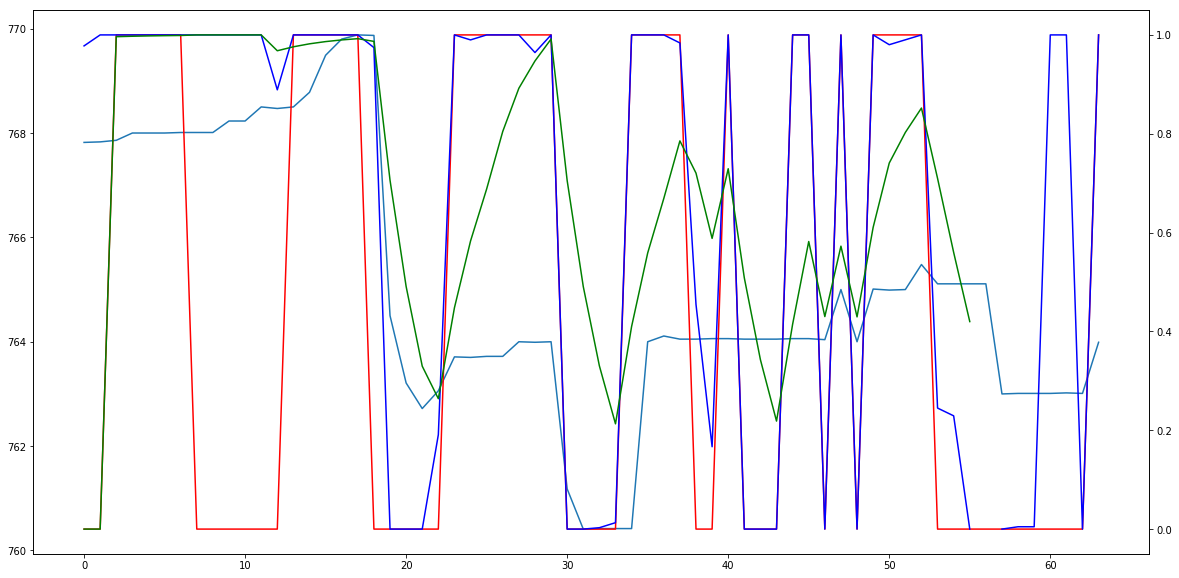

In [37]:
window = 4
smooth = 7

chart_back = 64
stances = []
sos = []
avgs = []

so = StochasticOscillator(window=4, smooth=7)
for price in prices[-(window + chart_back):]:
    stance, sov, avg = so.tick(price)
    stances.append(stance)
    sos.append(sov)
    avgs.append(avg)
    
fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()
ax1.plot(prices[-chart_back:])
ax2.plot(stances[-chart_back:], "r")
ax2.plot(sos[-chart_back:], "b")
ax2.plot(avgs[-chart_back:], "g")
algo = StochasticOscillator()
trader = Trader(algo)
final = 0
for price in prices[-(window + chart_back):]:
    final, _ = trader.tick(price)
print(prices[-1]/prices[-chart_back] * 100)
print(final)

In [12]:
class InverseMovingAverage:
    def __init__(self, window):
        self.avg = SMA(window)
    def tick(self, price):
        ret = False
        avg_val = self.avg.tick(price)
        if avg_val:
            ret = avg_val > price
        return ret
        

In [30]:
look_back = 1000
slow_win = 250

potential = []
print(prices[-1]/prices[-look_back] * 100)

for window in range (5, 30, 1):
    for smooth in np.arange(3, 15, 1):
        cut = 1.1
        #for cut in np.arange(0.1, 0.9, 0.1):
        islow = InverseMovingAverage(slow_win)
        stoch = StochasticOscillator(window, smooth, cut)
        for price in prices[-(slow_win + look_back):-look_back]:
            islow.tick(price)
            stoch.tick(price)
        
        trader = DoubleTrader(islow, stoch)
        final = 0
        for price in prices[-look_back:]:
            final, _ = trader.tick(price)
        potential.append((window, smooth, cut, final))
potential.sort(key=lambda tup: tup[3], reverse=True)
for sims in potential[:10]:
    print("{} - {} - {}: {}".format(*sims))

146.02971982194293
5 - 3 - 1.1: 93.55346797040627
5 - 4 - 1.1: 93.55346797040627
5 - 5 - 1.1: 93.55346797040627
5 - 6 - 1.1: 93.55346797040627
5 - 7 - 1.1: 93.55346797040627
5 - 8 - 1.1: 93.55346797040627
5 - 9 - 1.1: 93.55346797040627
5 - 10 - 1.1: 93.55346797040627
5 - 11 - 1.1: 93.55346797040627
5 - 12 - 1.1: 93.55346797040627
